Código para hacer el promedio de las mediciones de el espectró de la lámpara halógena, para así ver su desviación estándar y asignarle errores a las mediciones de cada frecuencia

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import glob
import matplotlib.ticker as ticker

import matplotlib as mpl

# Configurar escala predeterminada (por ejemplo, tamaño de figura)
mpl.rcParams['figure.figsize'] = [7, 4]   # Ancho x Alto en pulgadas


from scipy.interpolate import UnivariateSpline



In [25]:

# Reemplaza 'tu_archivo.csv' con la ruta a tu archivo CSV
df = pd.read_csv('/Users/Mauri/Desktop/Labo 5/Espectroscopía difractiva/3-10/halógena/halógena_promedio.csv', skiprows=53)

# Seleccionar las dos primeras columnas a partir de la fila 54
# Recuerda que en pandas los índices empiezan en 0, por lo que la fila 54 es el índice 53
columna1_data = df.iloc[0:-1, 0]
columna2_data = df.iloc[0:-1, 1]

# Convertir los datos a arrays de NumPy
array_columna1 = np.array(columna1_data)
array_columna2 = np.array(columna2_data)


#son strings asique los hago float
float_columna1 = [float(x) for x in array_columna1]
float_columna2 = [float(x) for x in array_columna2]


# Mostrar los arrays (opcional)
print("Array de la primera columna:")
print(array_columna1)
print("\nArray de la segunda columna:")
print(array_columna2)

Array de la primera columna:
['1.962940979e+02' '1.965012054e+02' '1.967083282e+02' ...
 '1.019740417e+03' '1.019984558e+03' '1.020228760e+03']

Array de la segunda columna:
[ 0.01413351  0.01490086  0.01415702 ...  0.00067073 -0.00020394
  0.0005485 ]


In [53]:
type(array_columna1[0])

str

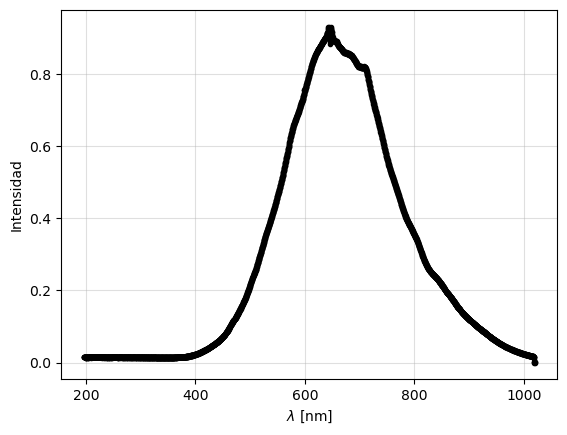

In [42]:
plt.plot(float_columna1, float_columna2, ".k")

#plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(150)

plt.xlabel(r'$\lambda$ [nm]')
plt.ylabel('Intensidad')
plt.grid(alpha = 0.4)

plt.show()        

In [4]:
# función para recorrer los csv

def cargar_datos(ruta):
    df = pd.read_csv(ruta, skiprows=53)

    # Seleccionar las dos primeras columnas a partir de la fila 54
    # Recuerda que en pandas los índices empiezan en 0, por lo que la fila 54 es el índice 53
    columna1_data = df.iloc[0:-1, 0]
    columna2_data = df.iloc[0:-1, 1]

    # Convertir los datos a arrays de NumPy
    array_columna1 = np.array(columna1_data)
    array_columna2 = np.array(columna2_data)

    #son strings asique los hago float
    lambdas = [float(x) for x in array_columna1]
    intensidad = [float(x) for x in array_columna2]

    return lambdas, intensidad

lambdas, intensidad = cargar_datos('/Users/Mauri/Desktop/Labo 5/Espectroscopía difractiva/3-10/halógena/halógena_promedio.csv')


#para obtener sólo las intensidades
def cargar_señal(ruta):
    df = pd.read_csv(ruta, skiprows=53)

    # Seleccionar las dos primeras columnas a partir de la fila 54
    # Recuerda que en pandas los índices empiezan en 0, por lo que la fila 54 es el índice 53
    columna2_data = df.iloc[0:-1, 1]

    # Convertir los datos a arrays de NumPy
    array_columna2 = np.array(columna2_data)

    #son strings asique los hago float
    intensidad = [float(x) for x in array_columna2]

    return intensidad

intensidad = cargar_señal('/Users/Mauri/Desktop/Labo 5/Espectroscopía difractiva/3-10/halógena/halógena_promedio.csv')
print(len(intensidad))


3647


Calculamos, para cada lambda, la desviación estándar con las 1000 mediciones que hicimos

In [23]:
#esto crea una lista con todas las rutas de los archivos que son .csv en la carpeta especificada (hay que dejar el /*.csv)
archivos = sorted(glob.glob("/Users/Mauri/Desktop/Labo 5/Espectroscopía difractiva/3-10/halógena/mediciones para el error/*.csv"))


# Cargar todos los datos en una lista
datos = [cargar_señal(f) for f in archivos]

# Convertir a un array 2D: shape (num_archivos, largo_señal)
matriz = np.stack(datos)

# Calcular la desviación estándar en cada punto (a lo largo de los archivos)
desv_std = np.std(matriz, axis=0)

# Ahora desv_std es un array 1D del mismo largo que cada señal
print(desv_std.shape)



(3647,)


In [24]:
print(desv_std)

[0.00215459 0.00212704 0.0021521  ... 0.00145112 0.00143385 0.00148004]


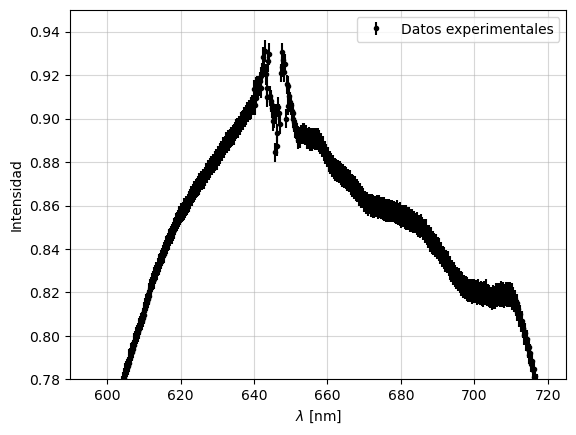

In [41]:

N = 1

plt.errorbar(float_columna1[::N], float_columna2[::N], yerr= desv_std[::N], fmt = ".k", ecolor = 'k', label = 'Datos experimentales')

#plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(150)

plt.xlabel(r'$\lambda$ [nm]')
plt.ylabel('Intensidad')

plt.xlim(590, 725)
plt.ylim(0.78, 0.95)

plt.grid(alpha = 0.5)
plt.legend()
plt.show()        

In [5]:
def desviaciones(ruta_carpeta_con_csvs):
    
    archivos = sorted(glob.glob(ruta_carpeta_con_csvs + "/*.csv"))

    # Cargar todos los datos en una lista
    datos = [cargar_señal(f) for f in archivos]

    # Convertir a un array 2D: shape (num_archivos, largo_señal)
    matriz = np.stack(datos)

    # Calcular la desviación estándar en cada punto (a lo largo de los archivos)
    desv_std = np.std(matriz, axis=0)

    return desv_std

errores = desviaciones("/Users/Mauri/Desktop/Labo 5/Espectroscopía difractiva/3-10/halógena/mediciones para el error")


Para poder ver la eficiencia, importo el espectro de la lámpara tabulado, luego interpolamos el tabulado, y calculamos el cociente
tomamos como error el del medido, ya que el error de los valores tabulados no los tenemos...

In [12]:
lambdas_med, intensidades_med = cargar_datos('/Users/Mauri/Desktop/Labo 5/Espectroscopía difractiva/3-10/halógena/halógena_promedio.csv')

err_intensidad = desviaciones("/Users/Mauri/Desktop/Labo 5/Espectroscopía difractiva/3-10/halógena/mediciones para el error")

# normalizo el espectro medido
intensidades_med = intensidades_med / np.max(intensidades_med)
err_intensidad = err_intensidad / np.max(intensidades_med)


df_tab = pd.read_csv("/Users/Mauri/Desktop/Labo 5/Espectroscopía difractiva/halógena_tabulado.csv")

lambdas_tab = df_tab.iloc[:, 0].to_numpy() 
intensidades_tab = df_tab.iloc[:, 1].to_numpy() 


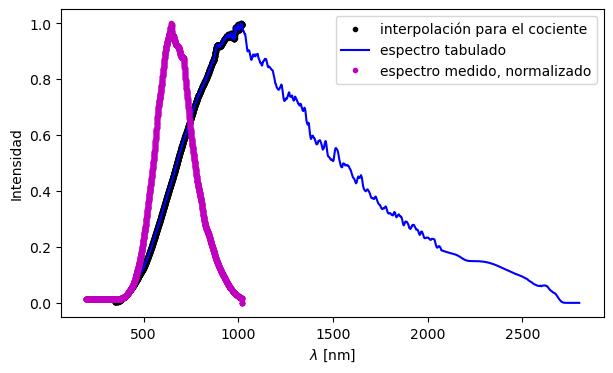

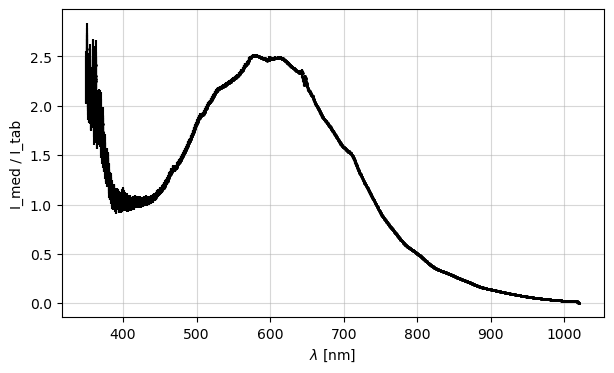

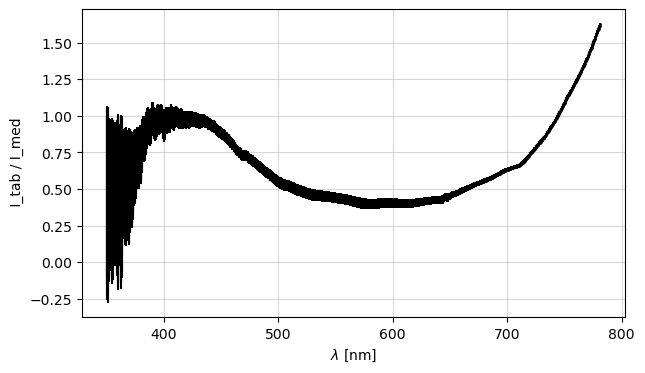

In [57]:
spline_tab = UnivariateSpline(lambdas_tab, intensidades_tab, s=0) # calculo la interpolación

x_fit = np.linspace(lambdas_tab[0], lambdas_tab[-1], 5000)

tabulados_interp = spline_tab(x_fit)

# Evaluamos a la interpolación en los lambdas medidos, y hacemos el cociente

#filtro los primeros porque como la interpolación se hizo con los tabulados y los tabulados arrancan recién en ~400nm, ahí no vale la interpolación(el polinomio tiende a infinito)
lambdas_med_filtrados= [num for num in lambdas_med if num > lambdas_tab[0]]
intensidades_med_filtradas = intensidades_med[(len(intensidades_med) - len(lambdas_med_filtrados)):] 
err_intensidad_filtrados = err_intensidad[(len(intensidades_med) - len(lambdas_med_filtrados)):] 

tabulados = spline_tab(lambdas_med_filtrados)

eficiencia = intensidades_med_filtradas / tabulados

err_eficiencia = err_intensidad_filtrados / tabulados


plt.plot(lambdas_med_filtrados, tabulados, ".k", label = 'interpolación para el cociente')
plt.plot(x_fit, tabulados_interp, "-b", label = 'espectro tabulado')
plt.plot(lambdas_med, intensidades_med, ".m", label = 'espectro medido, normalizado')
plt.legend(loc = 'upper right')
plt.xlabel(r'$\lambda$ [nm]')
plt.ylabel('Intensidad')
#plt.xlim(lambdas_tab[0])
plt.show()

#eficiencia = eficiencia / np.max(eficiencia)

plt.errorbar(lambdas_med_filtrados, eficiencia, yerr= err_eficiencia, fmt = ".k", ecolor = 'k', markersize = 2, label = 'I_med / I_tab')
#plt.plot(lambdas_med_filtrados, eficiencia, ".k")
plt.xlabel(r'$\lambda$ [nm]')
plt.ylabel('I_med / I_tab')
plt.grid(alpha = 0.5)
plt.show()

plt.errorbar(lambdas_med_filtrados[:-1000], (eficiencia**(-1))[:-1000], yerr= (err_eficiencia[:-1000])/((eficiencia**(-1))[:-1000]) , fmt = ".k", ecolor = 'k', markersize = 2, label = 'I_tab / I_med')
#plt.plot(lambdas_med_filtrados[:-1000], (eficiencia**(-1))[:-1000], ".k", markersize = 2)
plt.xlabel(r'$\lambda$ [nm]')
plt.ylabel(' I_tab / I_med')
plt.grid(alpha = 0.5)
plt.show()


In [ ]:
# Esto lo podemos exportar a un csv para después poder multiplicar esto y obtener una relación entre amplitudes más real
# Lo podemos hacer mismo en la propia aplicación de Thorlabs

